<a href="https://colab.research.google.com/github/roldugina/freecodecamp_data_analysis_projects/blob/main/page_view_time_series_visualizer/time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df=pd.read_csv('https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/page_view_time_series_visualizer/fcc-forum-pageviews.csv',parse_dates=True,index_col='date')


# Clean data
df = df[(df['value']>=np.percentile(df['value'],2.5))&(df['value']<=np.percentile(df['value'],97.5))]


def draw_line_plot():
    # Draw line plot
    fig,ax=plt.subplots(figsize=(12,4))
    ax=plt.plot()
    ax.plot(df_cleaned.index,df_cleaned['value'],color='red')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = None

    # Draw bar plot





    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)





    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

In [80]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [81]:
df=pd.read_csv('https://raw.githubusercontent.com/roldugina/freecodecamp_data_analysis_projects/main/page_view_time_series_visualizer/fcc-forum-pageviews.csv',parse_dates=True,index_col='date')

In [82]:
df_cleaned = df[(df['value']>=np.percentile(df['value'],2.5))&(df['value']<=np.percentile(df['value'],97.5))]


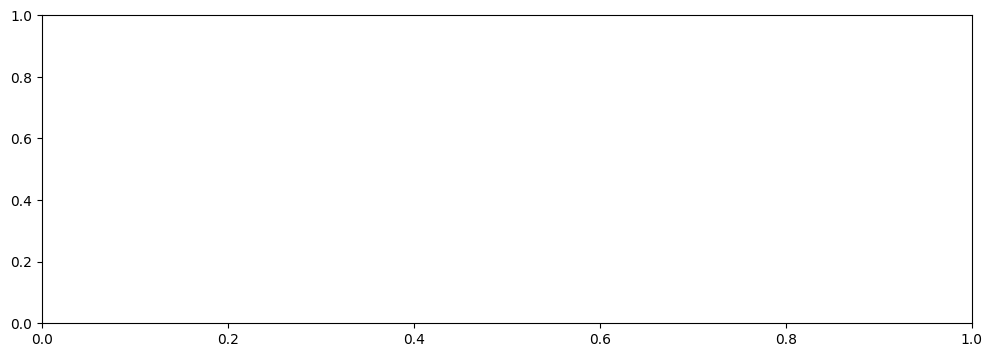

In [83]:
fig,ax=plt.subplots(figsize=(12,4))

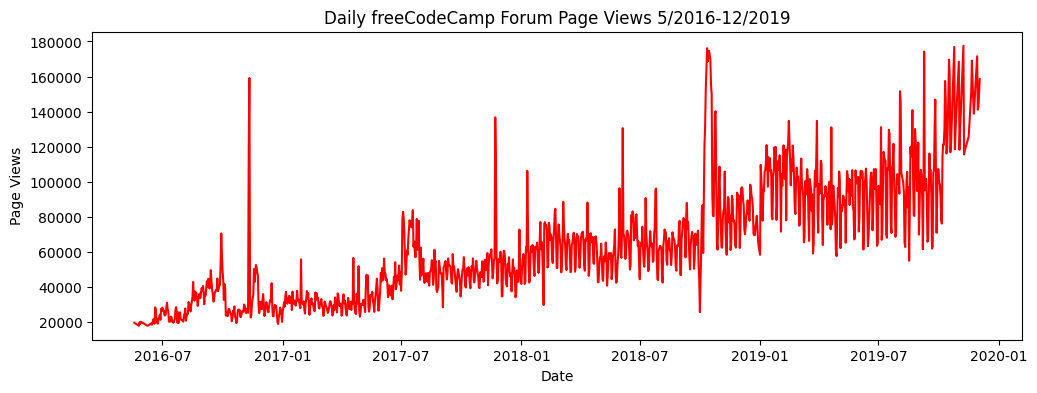

In [84]:
ax.plot(df_cleaned.index,df_cleaned['value'],color='red')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
fig

In [85]:
df_bar=df
df_bar['year']=df_bar.index.year
df_bar['month']=df_bar.index.month_name()
df_bar

,value,year,month
date,,,
2016-05-09,1201,2016,May
2016-05-10,2329,2016,May
2016-05-11,1716,2016,May
2016-05-12,10539,2016,May
2016-05-13,6933,2016,May
...,...,...,...
2019-11-29,171584,2019,November
2019-11-30,141161,2019,November
2019-12-01,142918,2019,December


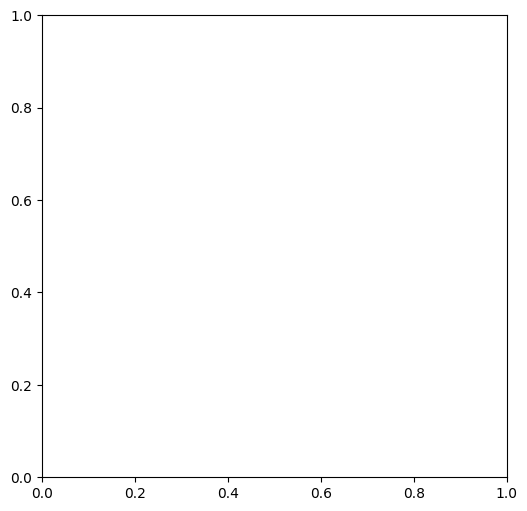

In [86]:
fig,ax2=plt.subplots(figsize=(6,6))

ValueError: The number of FixedLocator locations (9), usually from a call to set_ticks, does not match the number of labels (10).

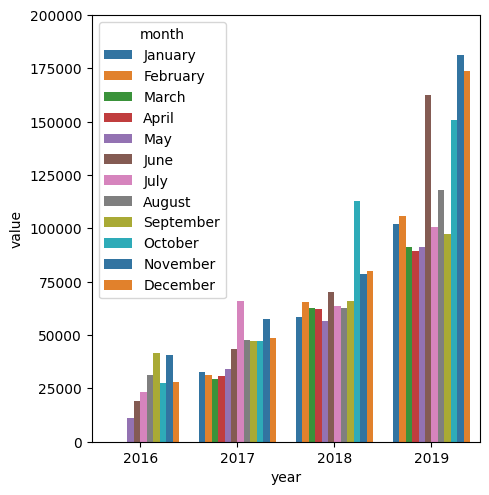

In [87]:
order=('January','February','March','April','May','June','July','August','September','October','November','December')
ax=sns.catplot(data=df_bar,x='year',y='value',hue='month',kind='bar',estimator='mean',errorbar=None,palette='tab10',hue_order=order,legend_out=False,facet_kws=dict(despine=False))
#ax.set(xlabel='Years',
#       ylabel='Average Page Views')
ax.set_yticklabels(np.linspace(0,180000,num=10,dtype='int').astype(str))
ax.set(xlabel='Years', ylabel='Average Page Views')
plt.legend(loc='upper left',title='Months')
plt.show()

In [ ]:
np.linspace(0,180000,num=10,dtype='int').astype(str)